# Problem statement
A bike sharing company has recently suffered considerable dips in its revenues.They want to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wants to know:

1) Which variables are significant in predicting the demand for shared electric cycles in the Indian market? <br>
2) How well those variables describe the electric cycle demands



In [1]:
#importing packages
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, f_oneway, ttest_ind

In [2]:
#Reading file
df=pd.read_csv('.....')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Column Profiling:

i.datetime: datetime <br>
ii.season: season (1: spring, 2: summer, 3: fall, 4: winter)<br>
iii.holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)<br>
iv.workingday: if day is neither weekend nor holiday is 1, otherwise is 0.<br>
v.weather:<br><br>
    1: Clear, Few clouds, partly cloudy, partly cloudy<br>
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br><br>
vi.temp: temperature in Celsius<br>
vii.atemp: feeling temperature in Celsius<br>
viii.humidity: humidity<br>
ix.windspeed: wind speed<br>
x.casual: count of casual users<br>
xi.registered: count of registered users<br>
xii.count: count of total rental bikes including both casual and registered<br>

In [4]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [6]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [7]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [8]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [9]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
#Checking for null values
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
#changing datetime feature datatype from object to datetime
df['datetime'] =  pd.to_datetime(df['datetime'])

In [12]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [13]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Outlier detection

<AxesSubplot:xlabel='season', ylabel='count'>

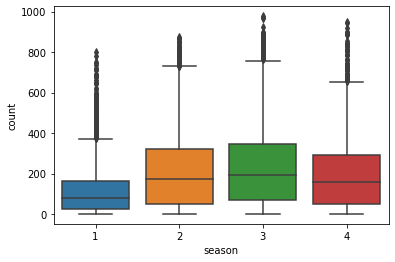

In [14]:
sns.boxplot(data=df,x='season',y='count')

<AxesSubplot:xlabel='holiday', ylabel='count'>

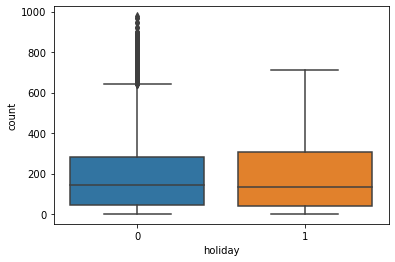

In [15]:
sns.boxplot(data=df,x='holiday',y='count')

<AxesSubplot:xlabel='workingday', ylabel='count'>

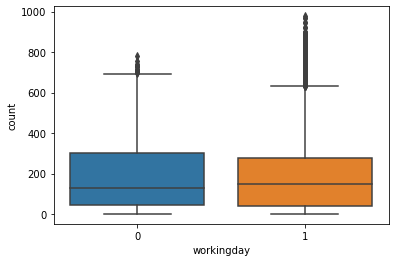

In [16]:
sns.boxplot(data=df,x='workingday',y='count')

<AxesSubplot:xlabel='weather', ylabel='count'>

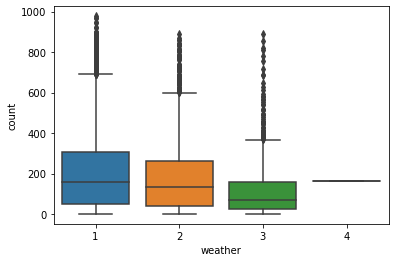

In [17]:
sns.boxplot(data=df,x='weather',y='count')

In [18]:
# Outliers can not be removed as the number more

### Change of datatypes

In [19]:
max(df['datetime'])

Timestamp('2012-12-19 23:00:00')

In [20]:
min(df['datetime'])

Timestamp('2011-01-01 00:00:00')

In [21]:
df['year'] = pd.DatetimeIndex(df['datetime']).year

In [22]:
df['month'] = pd.DatetimeIndex(df['datetime']).month

In [23]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1


## EDA

<AxesSubplot:xlabel='year', ylabel='count'>

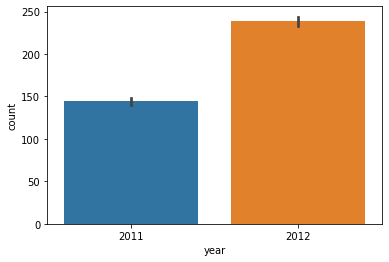

In [24]:
sns.barplot(data=df,x='year',y='count')
#In 2012 the number of user has increased drastically

<AxesSubplot:xlabel='month', ylabel='count'>

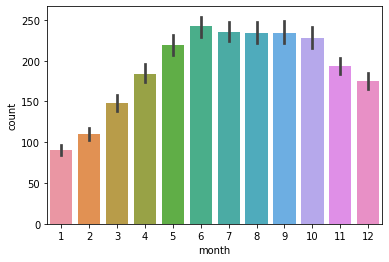

In [25]:
sns.barplot(data=df,x='month',y='count')
#Most of the users use bike from June till Oct

<AxesSubplot:xlabel='holiday', ylabel='count'>

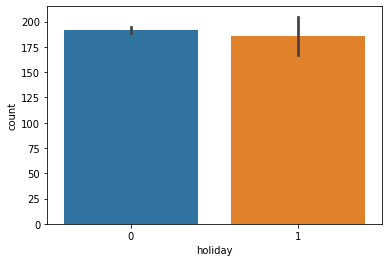

In [26]:
sns.barplot(data=df,x='holiday',y='count')
#Usage are almost same during hoildays and non-holidays

<AxesSubplot:xlabel='workingday', ylabel='count'>

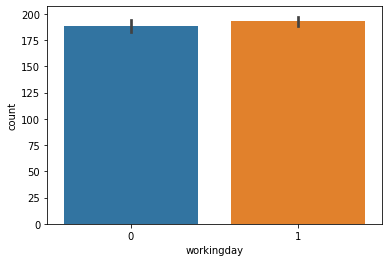

In [27]:
sns.barplot(data=df,x='workingday',y='count')
##Usage are almost same during working and non-working days

<AxesSubplot:xlabel='weather', ylabel='count'>

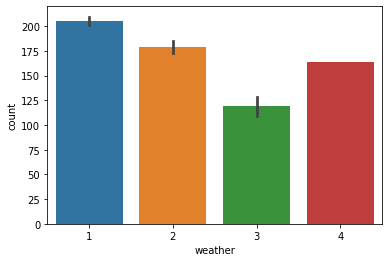

In [28]:
sns.barplot(data=df,x='weather',y='count')
#Maximum users during weather 1 (Clear, Few clouds, partly cloudy, partly cloudy)
#Minimuum users during weather 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)

<AxesSubplot:>

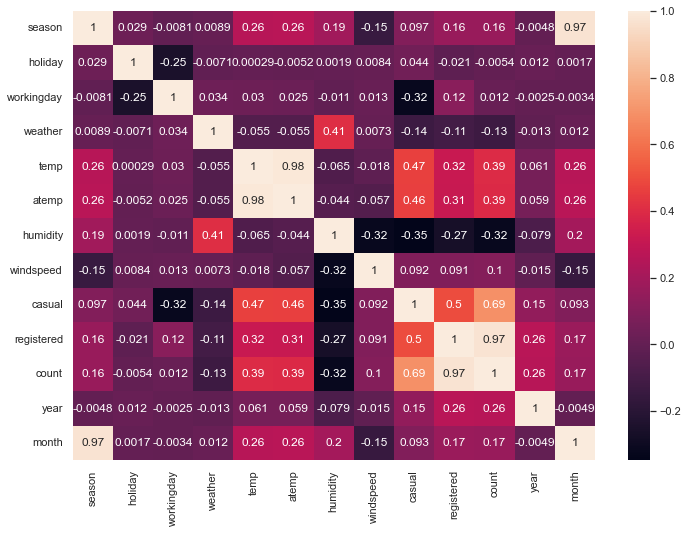

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(),annot=True)
# Registered users and usage have high correlation
# Temparature and number of causal and registred useres are correlated.

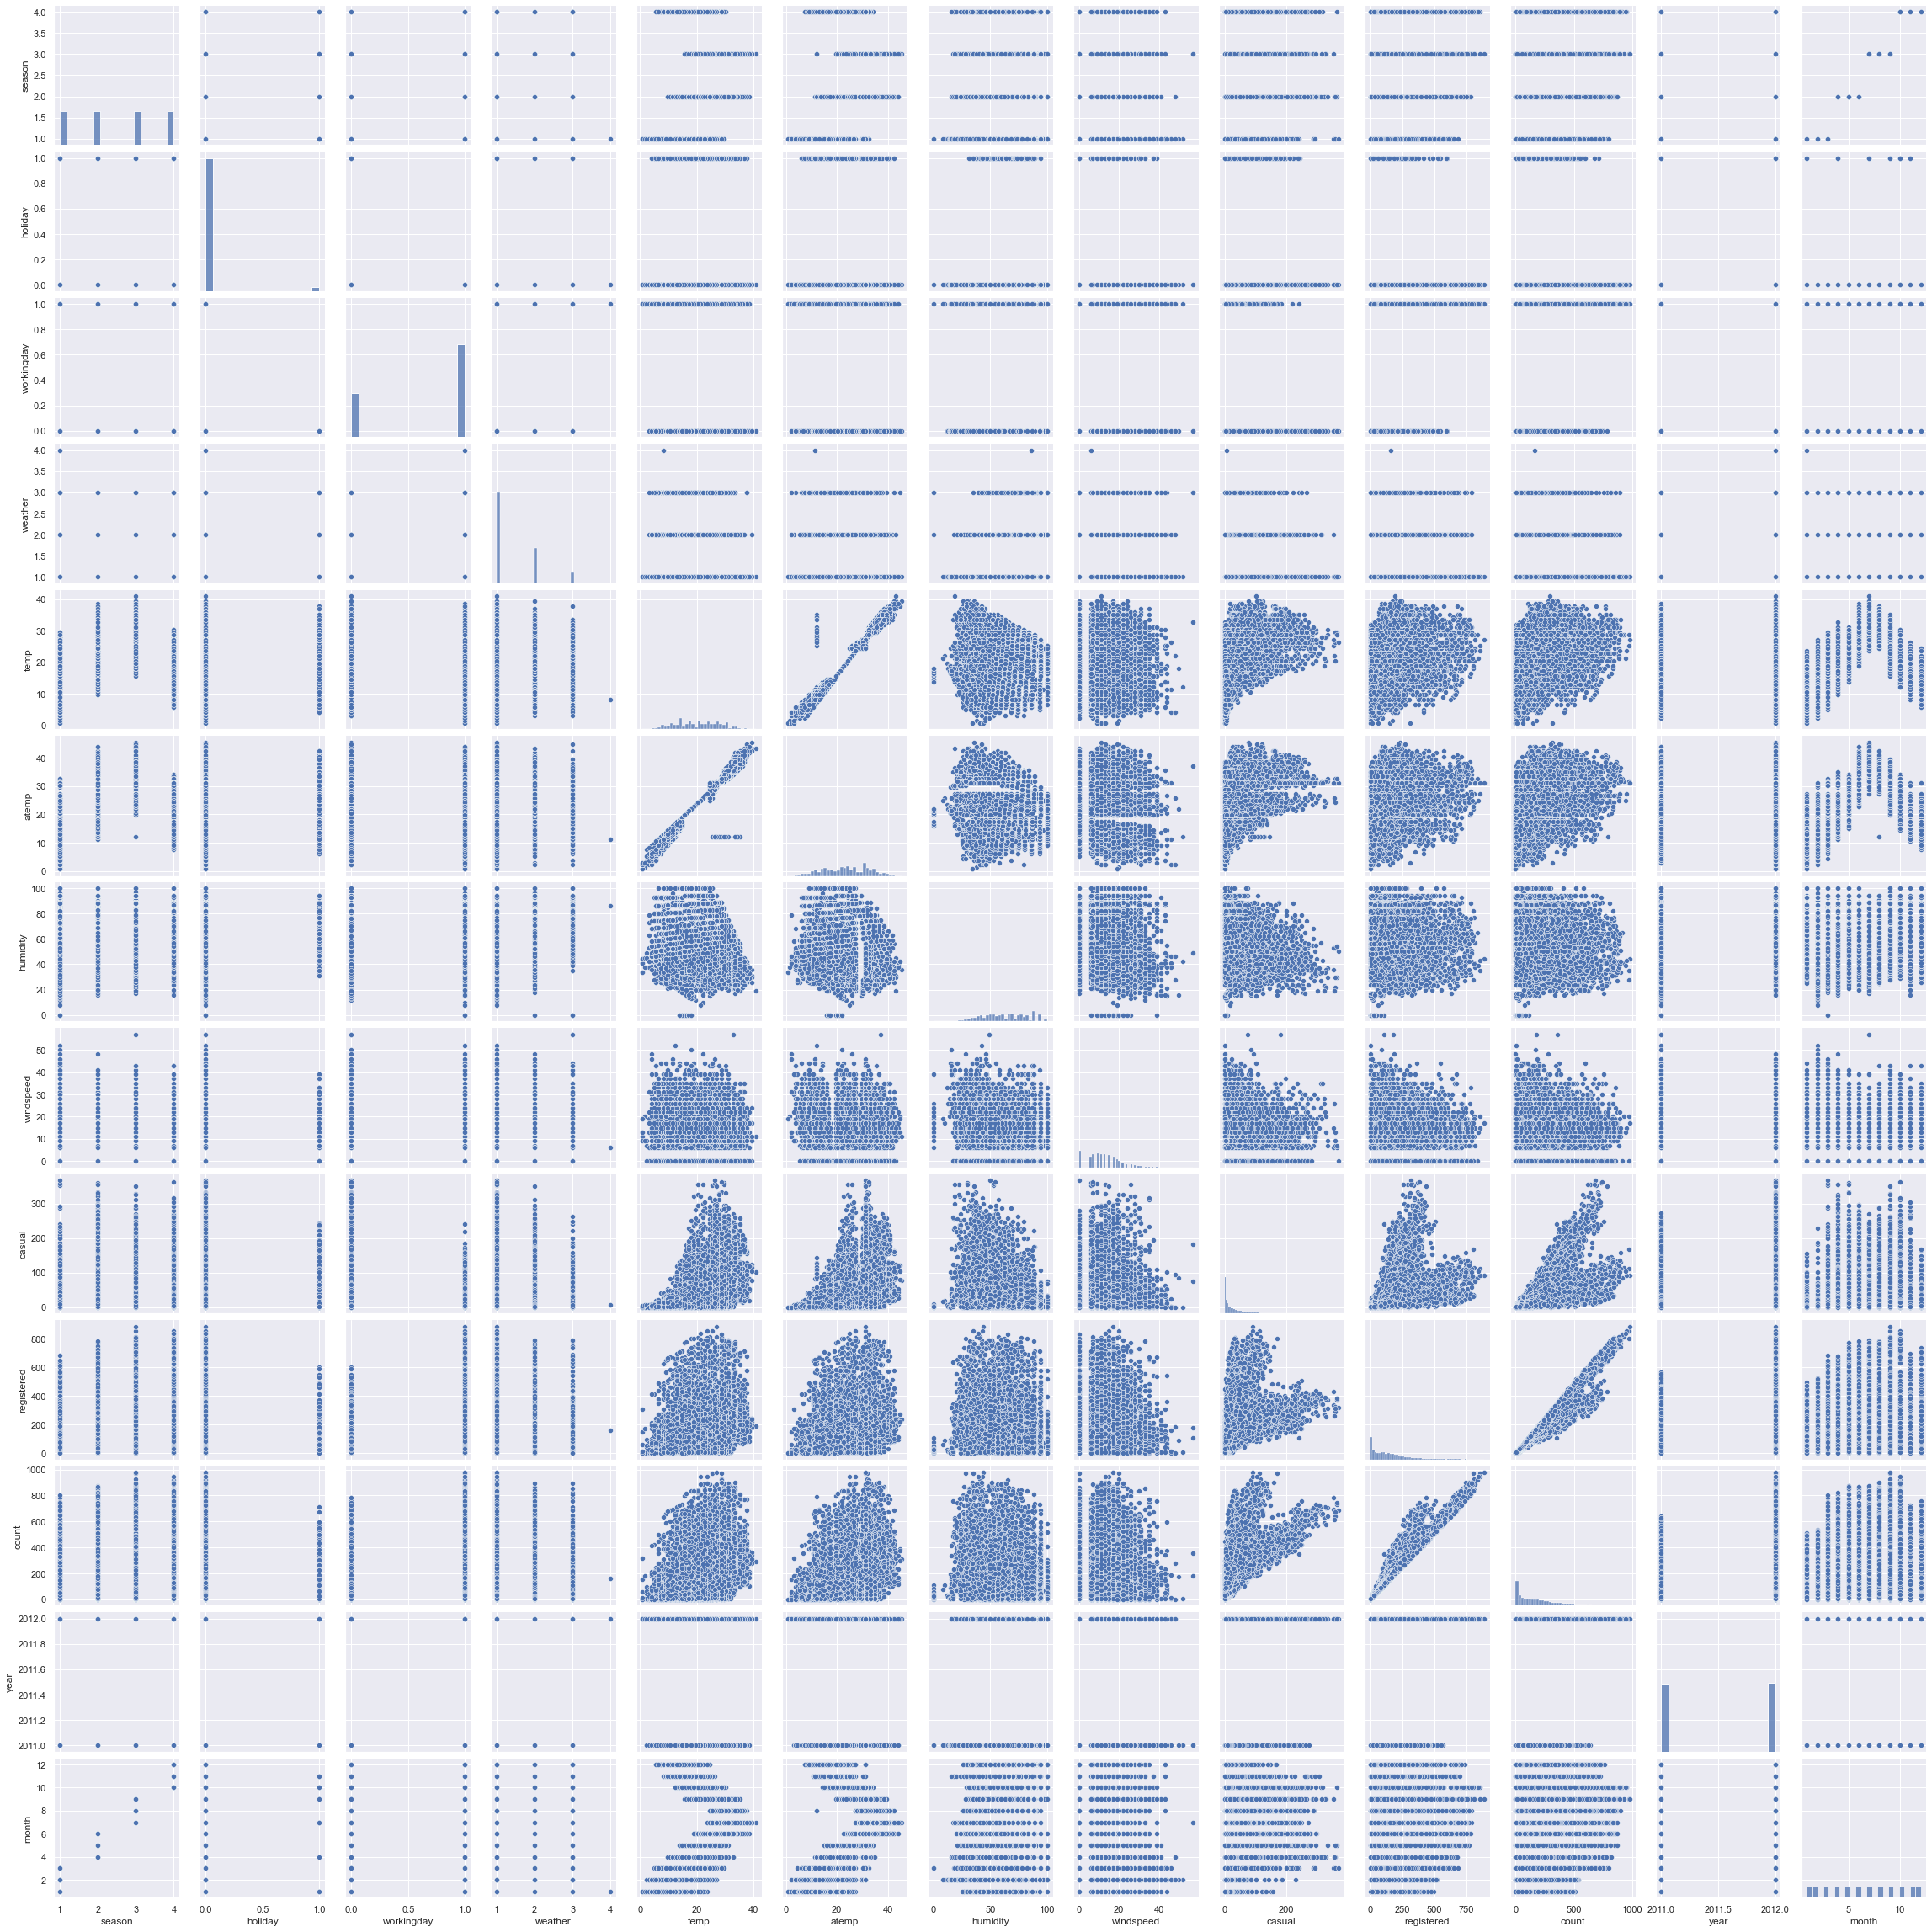

In [30]:
sns.pairplot(df)
#No relation was established

## Check for Normal Distribution

<AxesSubplot:xlabel='count', ylabel='Count'>

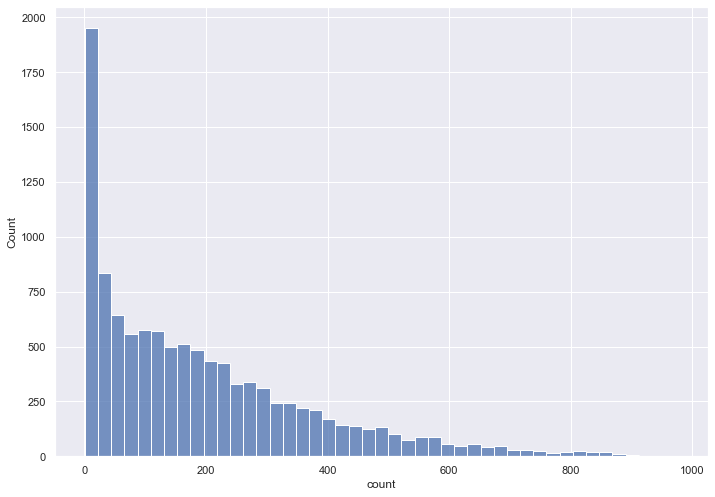

In [31]:
sns.histplot(df,x="count")

Hourly usage is right skewed

In [32]:
df1=df

In [33]:
#Tying to convert to log normal
df1['count']=np.log(df1['count'])

<AxesSubplot:xlabel='count', ylabel='Count'>

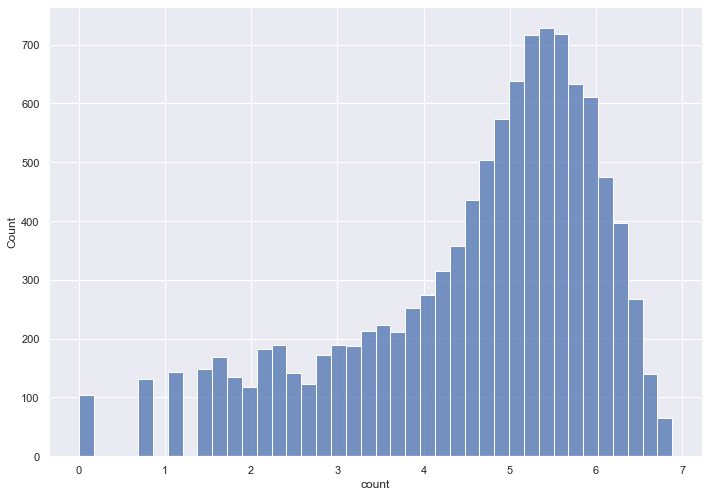

In [34]:
sns.histplot(df1,x="count")

Not log normal distribution

## Hypothesis testing
### Assuming significant level (alpha)=0.05 (5%)

### Working Day has an effect on the number of electric cycles rented (2-Sample T-test)

H0: Working day and  number of electric cycles rented are independent <br>
H1: Working day and  number of electric cycles rented are dependent

In [35]:
working_rented=df[df['workingday']==1]['count']

In [36]:
non_working_rented=df[df['workingday']==0]['count']

In [37]:
p_value_working_reneted=ttest_ind(working_rented, non_working_rented)

In [38]:
print(f'p value = {p_value_working_reneted[1]}' )

p value = 0.05860191030754906


Failed to reject null hypothesis with 95 percentage confidnece

### Check if no. of cycles rented is similar or different in different 1. weather 2. season (ANNOVA)

In [39]:
weather_1=df[df['weather']==1]['count']
weather_2=df[df['weather']==2]['count']
weather_3=df[df['weather']==3]['count']
weather_4=df[df['weather']==4]['count']

In [40]:
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples 
from scipy.stats import levene

In [41]:
print(weather_1.shape)
print(weather_2.shape)
print(weather_3.shape)
print(weather_4.shape)

(7192,)
(2834,)
(859,)
(1,)


In [42]:
season_1=df[df['season']==1]['count']
season_2=df[df['season']==2]['count']
season_3=df[df['season']==3]['count']
season_4=df[df['season']==4]['count']

In [43]:
print(season_1.shape)
print(season_2.shape)
print(season_3.shape)
print(season_4.shape)

(2686,)
(2733,)
(2733,)
(2734,)


### Levene's test for varience

In [44]:
#H0:Varience of all four group of weather are same
#H1: Varience are different
levene(weather_1,weather_2,weather_3,weather_4)

LeveneResult(statistic=0.9262757877138191, pvalue=0.4270348183543722)

Reject null hypothsis. The varience are different.

In [45]:
#H0:Varience of all four group of seasons are same
#H1: Varience are different
levene(season_1,season_2,season_3,season_4)

LeveneResult(statistic=9.640605587638781, pvalue=2.3678125658230693e-06)

Reject null hypothsis. The varience are different.

### QQ Plot

C:\Users\gokul\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\gokul\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\gokul\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


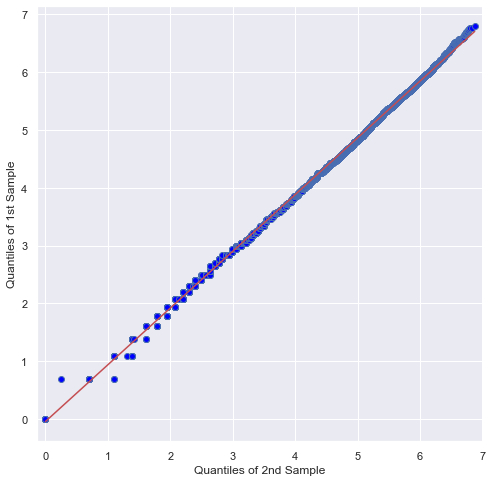

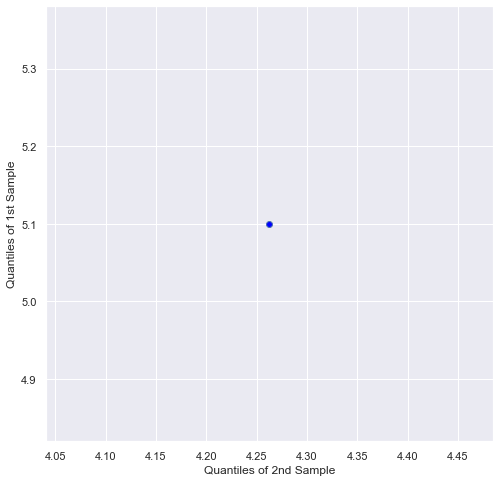

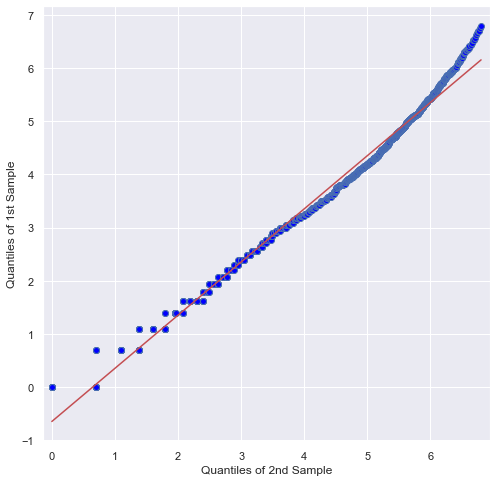

In [46]:
sns.set(rc={'figure.figsize':(8,8)})
qqplot_2samples(weather_1, weather_2, line="r")
qqplot_2samples(weather_3, weather_4, line="r")
qqplot_2samples(weather_3, weather_1, line="r")
plt.show()

Doest not follow normal distribution every time

C:\Users\gokul\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\gokul\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\gokul\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


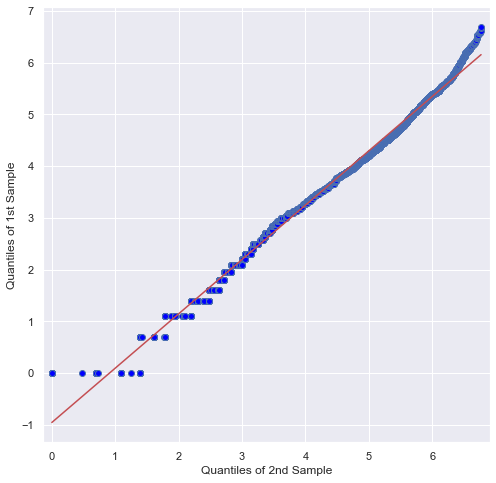

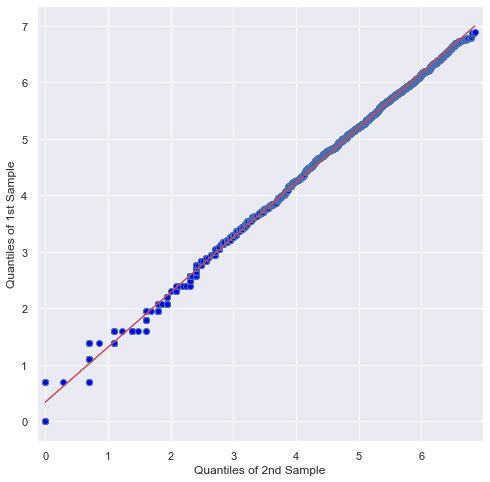

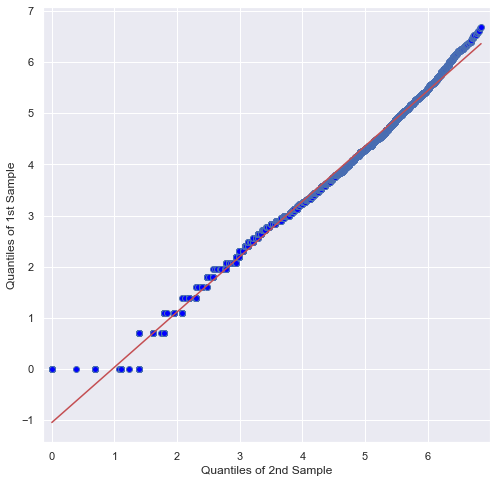

In [47]:
qqplot_2samples(season_1, season_2, line="r")
qqplot_2samples(season_3, season_4, line="r")
qqplot_2samples(season_1, season_4, line="r")
plt.show()

Doest not follow normal distribution every time

### ANNOVA

#### Count v/s Weather

H0:Averege number of count inall four weather are same
H0:Averege number of count inall four weather are different

In [48]:
p_value_weather=f_oneway(weather_1, weather_2, weather_3, weather_4)[1]

In [49]:
print(f'p value = {p_value_weather}' )

p value = 5.214500121600914e-32


With 95% confidence, p-value is less than 0.05 (alpa). So we reject null hypothesis <br>
Weather and usage are dependent

#### Count v/s Season

H0:Averege number of count is all four season are same <br>
H1:Averege number of count is all four season are different

In [50]:
p_value_season=f_oneway(season_1, season_2, season_3, season_4)[1]

In [51]:
print(f'p value = {p_value_season}' )

p value = 1.3071364586238867e-121


With 95% confidence, p-value is less than 0.05 (alpa). So we reject null hypothesis <br>
Season and usage are dependent

### Check if Weather is dependent on the season (Chi-square test)

In [52]:
weather_climate=pd.crosstab(df["weather"], df["season"])

In [53]:
weather_climate

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


H0: Weather and season are independent <br>
H1: Weather and season are dependent

In [54]:
chi2_contingency(weather_climate)

(49.15865559689363,
 1.5499250736864862e-07,
 9,
 array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
        [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
        [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
        [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

With 95% confidence, p-value is less than 0.05 (alpa). So we reject null hypothesis
Season and weather are dependent

## Business Insights.
1) In 2012 the number of user has increased drastically <br>
2) Most of the users use bike from June till Oct <br>
3) Registered users and usage have high correlation <br>
4) Temparature and number of causal and registred useres are correlated. <br>
5) Temparature and number of causal and registred useres are correlated <br>
6) Maximum users during weather 1 (Clear, Few clouds, partly cloudy, partly cloudy) <br>
7) Minimuum users during weather 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)#Maximum users during weather 1 (Clear, Few clouds, partly cloudy, partly cloudy) <br>
8) Minimuum users during weather 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) <br>
9) Usage are almost same during working and non-working daysUsage are almost same during working and non-working days <br>
10) Weather and usage are dependent <br>
11) Season and usage are dependent <br>
12) Working days and number of electric cycles rented are independent 

## Recommendation.

1) From Nov to Jan to May bike usage decrease so maintance can be done during this time. Else bike can be shifted to other cities<br>
2) Give offers to casual users to migrate to registed user <br>
3) Bike avilability shoud be max in Clear, Few clouds, partly cloudy, partly cloudy weather <br>
4) During Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds weather bike to under go maintanace so as to make bike avialible for other times. <br>
